# Milestone 2 - Phase 1 - FTDS (Offline)

## I. Introduction
- Peter Zultan
- HCK-001
- Objective: Create regression model for predicting `rental_price` from the dataset.

## II. Dataset
Oyo Rental Price Prediction in Shenzen, China

## III. Objective
Buatlah model Regression menggunakan Linear Regression untuk memprediksi harga perjalanan platform ride-hailing dengan dataset yang disediakan.

## IV. Import Libraries

In [1]:
# Define Libraries

import phik
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import feature_engine
import pickle

import warnings
warnings.filterwarnings('ignore')
import datetime

#pipeline
from sklearn.pipeline import make_pipeline

#For Encode string to numeric
from sklearn.preprocessing import OrdinalEncoder

#For scaling numeric
from sklearn.preprocessing import PowerTransformer

#For Handling Outliers
from feature_engine.outliers import Winsorizer

# For Regression Problems
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split

#check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Multivariate Normality Test
from statsmodels.graphics.gofplots import qqplot

# Evaluate Regression Models
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#Hyperparameter
from sklearn.model_selection import GridSearchCV

#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

## V. Data Loading

In [2]:
#load data 
df_price = pd.read_csv("price_h8dsft_Milestone2P1_Peter Z.csv")
df_oyo=pd.read_csv("facilities_h8dsft_Milestone2P1_PeterZ.csv")

In [3]:
#check dataframes shape
print("shape price df: ", df_price.shape)
print("shape oyo: ", df_oyo.shape)

shape price df:  (5834, 1)
shape oyo:  (5834, 25)


## VI. Data Cleaning

In [4]:
#concat dataframes oyo and price
df = pd.concat([df_oyo, df_price], axis=1)
df

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,...,maximum_nights,number_of_reviews,property_type,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,price
0,6,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",0,2.5,Real Bed,1.0,3.0,1,moderate,1,...,10,1,House,10.0,10.0,10.0,100.0,10.0,Private room,$300.00
1,2,"{""Air Conditioning"",Heating,""Family/Kid Friend...",29,0.0,Futon,1.0,1.0,1,moderate,1,...,7,0,Camper/RV,NaN,NaN,NaN,NaN,NaN,Private room,$99.00
2,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.5,Real Bed,1.0,1.0,2,flexible,1,...,1125,0,House,NaN,NaN,NaN,NaN,NaN,Private room,$100.00
3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.5,Real Bed,1.0,1.0,2,flexible,1,...,1125,0,House,NaN,NaN,NaN,NaN,NaN,Private room,$100.00
4,6,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",27,2.0,Real Bed,3.0,3.0,2,strict,1,...,1125,0,House,NaN,NaN,NaN,NaN,NaN,Entire home/apt,$599.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5829,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",17,1.0,Real Bed,1.0,2.0,3,moderate,1,...,1125,13,Apartment,10.0,10.0,10.0,88.0,10.0,Entire home/apt,$125.00
5830,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",15,1.0,Real Bed,1.0,2.0,11,strict,3,...,1125,9,Apartment,10.0,10.0,10.0,100.0,9.0,Entire home/apt,$179.00
5831,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",11,1.0,Real Bed,1.0,2.0,2,moderate,1,...,1125,0,Condominium,NaN,NaN,NaN,NaN,NaN,Private room,$85.00
5832,1,{},30,1.0,Real Bed,1.0,1.0,1,flexible,1,...,1125,0,Apartment,NaN,NaN,NaN,NaN,NaN,Shared room,$25.00


In [5]:
pd.set_option('display.max_rows', 10)

### a. Handling NaN Values

In [6]:
print(df.isnull().sum().to_string()) #to show all of the rows of null columns in dataset

accommodates                         0
amenities                            0
availability_30                      0
bathrooms                           46
bed_type                             0
bedrooms                             6
beds                                23
calculated_host_listings_count       0
cancellation_policy                  0
guests_included                      0
has_availability                     0
host_is_superhost                   15
host_listings_count                 15
instant_bookable                     0
latitude(North)                      0
longitude(East)                      0
maximum_nights                       0
number_of_reviews                    0
property_type                        0
review_scores_checkin             2057
review_scores_communication       2057
review_scores_location            2056
review_scores_rating              2046
review_scores_value               2057
room_type                            0
price                    

- Columns about reviews have a lot of nan value, this is caused by tenants do not review their stay.
- Some of the Oyo rental don't has bathroom probably because the rental room is a shared room or private room type in a house or apartment, the bathroom probably is a shared bathroom.
- It is impossible for a rental room/ hotel /a place for sleep don't have beds, nan value probably caused by hosts forget to fill it. The data will be checked and filled, if not possible it will be dropped.
- For host columns, nan values will be checked what is the possible of cause.

In [7]:
#check columns
df.columns

Index(['accommodates', 'amenities', 'availability_30', 'bathrooms', 'bed_type',
       'bedrooms', 'beds', 'calculated_host_listings_count',
       'cancellation_policy', 'guests_included', 'has_availability',
       'host_is_superhost', 'host_listings_count', 'instant_bookable',
       'latitude(North)', 'longitude(East)', 'maximum_nights',
       'number_of_reviews', 'property_type', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_rating', 'review_scores_value', 'room_type', 'price'],
      dtype='object')

In [8]:
print('nan values superhost label: ', df['host_is_superhost'].unique())
print('total nan values superhost: ', df['host_is_superhost'].isnull().sum())

nan values superhost label:  ['f' 't' nan]
total nan values superhost:  15


In [9]:
host_nan = df[(df['host_is_superhost'].isnull())]
print('host_nan shape: ', host_nan.shape)

host_nan shape:  (15, 26)


In [10]:
host_nan.head(3)

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,...,maximum_nights,number_of_reviews,property_type,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,price
202,2,"{""Wireless Internet"",""Air Conditioning"",""Free ...",0,1.0,Real Bed,1.0,1.0,1,flexible,1,...,1125,3,House,10.0,10.0,10.0,80.0,9.0,Private room,$45.00
799,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6,1.0,Real Bed,1.0,1.0,1,strict,2,...,10,4,Apartment,10.0,10.0,10.0,95.0,10.0,Entire home/apt,$119.00
832,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",15,1.0,Real Bed,1.0,1.0,1,flexible,1,...,1125,4,Apartment,9.0,10.0,10.0,93.0,9.0,Entire home/apt,$165.00


Host columns have nan values even thouogh they have good reviews, it is very strange. The most possible caused was probably when importing the data there is an error. Rather than filled it with imputer, it is better to be dropped. 

In [11]:
dfcopy = df.copy()
dfcopy.shape

(5834, 26)

In [12]:
dfcopy = dfcopy[(dfcopy['host_is_superhost'].notnull())]
dfcopy.shape

(5819, 26)

Host columns with nan values has been dropped.

In [13]:
dfcopy['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [14]:
bath_nan = dfcopy[(dfcopy['bathrooms'].isnull())]
bath_nan.shape

(45, 26)

`room_type` column inform there are 3 types of room rented for tenants: 
- private room means the room is located inside a building where hosts usually live in the building too.
- shared room means there are more than 1 room in building and the other room is for another tenants.
- Entire house/apt means tenants rent the entire house/apt.

`bathrooms` column are filled with NaN values probably because hosts forget or do not filled bathrooms column or when importing dataset, an error are occured. 

Action will be taken:
- For NaN value in `bathrooms` column with shared room and private room type will be filled with 0 means rented room does not has bathroom inside.
- For NaN value in `bathrooms` column with entire house/apt rented it will be dropped consider there are different size house/apt rental which can accomodate lot of people and fewer people, which mean more people probably has more than 1 bathroom in the house.

In [15]:
#get index for private room and bathroom nan value
dfcopy.index[(dfcopy["room_type"]=='Private room') & (dfcopy["bathrooms"].isnull())]

Int64Index([ 205,  215,  501,  582,  711,  722,  844, 1145, 1181, 1759, 3318,
            4066, 4721, 5088, 5140, 5275, 5391],
           dtype='int64')

In [16]:
cols = [205,  215,  501,  582,  711,  722,  844, 1145, 1181, 1759, 3318,
            4066, 4721, 5088, 5140, 5275, 5391]
#change nan values to 0
for i in cols:
    dfcopy.loc[i, 'bathrooms'] = 0

In [17]:
dfcopy.index[(dfcopy["room_type"]=='Shared room') & (dfcopy["bathrooms"].isnull())]

Int64Index([174, 360, 1177, 4442], dtype='int64')

In [18]:
cols = [174, 360, 1177, 4442]
#change nan values to 0
for i in cols:
    dfcopy.loc[i, 'bathrooms'] = 0

In [19]:
dfcopy = dfcopy[(dfcopy['bathrooms'].notnull())]
dfcopy.shape

(5795, 26)

NaN values in `bathrooms` has been cleaned

In [219]:
cols = ['room_type',
       'property_type', 'cancellation_policy',
       'bed_type']

In [220]:
for i in cols:
    print(i, ' unique: ', df[i].unique())

room_type  unique:  ['Private room' 'Entire home/apt' 'Shared room']
property_type  unique:  ['House' 'Camper/RV' 'Bed & Breakfast' 'Apartment' 'Townhouse'
 'Condominium' 'Bungalow' 'Cabin' 'Other' 'Loft' 'Villa' 'Treehouse'
 'Tent' 'Boat' 'Hut' 'Chalet' 'Earth House' 'Tipi']
cancellation_policy  unique:  ['moderate' 'flexible' 'strict' 'super_strict_30' 'no_refunds']
bed_type  unique:  ['Real Bed' 'Futon' 'Airbed' 'Pull-out Sofa' 'Couch']


In [20]:
cols = ['review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_rating', 'review_scores_value']

In [21]:
for i in cols:
    print(i, ' unique: ', df[i].unique())

review_scores_checkin  unique:  [10. nan  9.  8.  7.  6.  4.  2.]
review_scores_communication  unique:  [10. nan  9.  8.  6.  4.  2.  7.]
review_scores_location  unique:  [10. nan  9.  4.  8.  6.  7.  5.]
review_scores_rating  unique:  [100.  nan  99.  93.  87.  94.  83.  60.  80.  97.  90.  96.  91.  98.
  95.  89.  92.  88.  86.  84.  35.  73.  82.  67.  56.  85.  20.  75.
  40.  71.  70.  81.  50.  54.  79.  78.  69.  68.  76.  77.  74.  53.]
review_scores_value  unique:  [10. nan  9.  8.  7.  6.  4.  2.  5.]


In [22]:
for i in cols:
    dfcopy[i] = dfcopy[i].fillna(0)

In [23]:
test = dfcopy.isnull().sum()

nan values in review columns have converted to 0.

In [24]:
dfcopy.dropna(axis = 0, inplace = True)

In [25]:
dfcopy.shape

(5775, 26)

In [26]:
df.shape

(5834, 26)

Beds are dropped because there are different accomodations quantity in each building. Total remove rows are 59 rows, less than 5%.

### b. Handling data types

In [27]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5775 entries, 0 to 5833
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   accommodates                    5775 non-null   int64  
 1   amenities                       5775 non-null   object 
 2   availability_30                 5775 non-null   int64  
 3   bathrooms                       5775 non-null   float64
 4   bed_type                        5775 non-null   object 
 5   bedrooms                        5775 non-null   float64
 6   beds                            5775 non-null   float64
 7   calculated_host_listings_count  5775 non-null   int64  
 8   cancellation_policy             5775 non-null   object 
 9   guests_included                 5775 non-null   int64  
 10  has_availability                5775 non-null   object 
 11  host_is_superhost               5775 non-null   object 
 12  host_listings_count             57

Need to convert `price` column from object to float

In [28]:
dfcopy['price'].unique()

array(['$300.00', '$99.00', '$100.00', '$599.00', '$54.00', '$40.00',
       '$130.00', '$44.00', '$50.00', '$49.00', '$55.00', '$180.00',
       '$36.00', '$125.00', '$59.00', '$150.00', '$175.00', '$120.00',
       '$450.00', '$75.00', '$70.00', '$110.00', '$200.00', '$34.00',
       '$155.00', '$700.00', '$819.00', '$1,200.00', '$1,250.00',
       '$250.00', '$800.00', '$85.00', '$600.00', '$1,000.00',
       '$1,650.00', '$629.00', '$225.00', '$469.00', '$565.00', '$499.00',
       '$149.00', '$48.00', '$89.00', '$165.00', '$115.00', '$909.00',
       '$135.00', '$145.00', '$350.00', '$65.00', '$6,500.00', '$249.00',
       '$79.00', '$109.00', '$88.00', '$144.00', '$699.00', '$625.00',
       '$102.00', '$119.00', '$199.00', '$97.00', '$118.00', '$163.00',
       '$400.00', '$169.00', '$650.00', '$60.00', '$500.00', '$157.00',
       '$172.00', '$399.00', '$63.00', '$95.00', '$185.00', '$90.00',
       '$190.00', '$170.00', '$370.00', '$114.00', '$143.00', '$750.00',
       '$106.

need to remove $ sign

In [29]:
#remove $ sign
dfcopy['price'] = dfcopy['price'].str.replace("$",'')
dfcopy['price'] = dfcopy['price'].str.replace(",",'')

In [30]:
dfcopy['price'] = dfcopy['price'].astype(float)

find coma in data, coma need to remove

In [31]:
dfcopy.isnull().sum()

accommodates              0
amenities                 0
availability_30           0
bathrooms                 0
bed_type                  0
                         ..
review_scores_location    0
review_scores_rating      0
review_scores_value       0
room_type                 0
price                     0
Length: 26, dtype: int64

no null values after convert object to float means success!!!

## VII. Exploratory Data Analysis

Skweness value:  8.522956913489
Mean value:  285.8561038961039
Median value:  175.0
Min value:  0.0
Max value:  10000.0


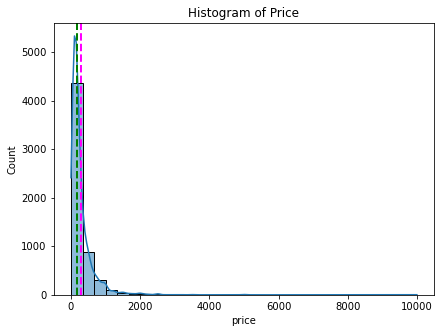

In [181]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(dfcopy['price'], bins=30, kde=True)
plt.axvline(dfcopy['price'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(dfcopy['price'].median(), color='green', linestyle='dashed', linewidth=2)
plt.title('Histogram of Price')

print('Skweness value: ', dfcopy['price'].skew())
print('Mean value: ', dfcopy['price'].mean())
print('Median value: ', dfcopy['price'].median())
print('Min value: ', dfcopy['price'].min())
print('Max value: ', dfcopy['price'].max())

Most of the OYO rental price in Shenzen is 175.0, the range of the price is from 0 - $10,000.

Skweness value:  1.376464460341642
Mean value:  4.394458874458874
Median value:  4.0
Min value:  1
Max value:  16


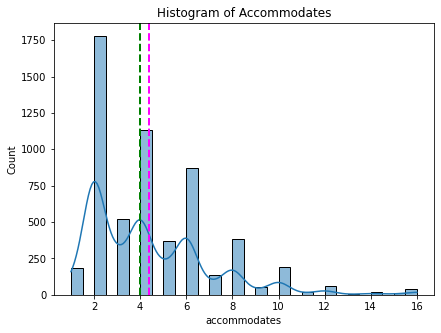

In [182]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(dfcopy['accommodates'], bins=30, kde=True)
plt.axvline(dfcopy['accommodates'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(dfcopy['accommodates'].median(), color='green', linestyle='dashed', linewidth=2)
plt.title('Histogram of Accommodates')

print('Skweness value: ', dfcopy['accommodates'].skew())
print('Mean value: ', dfcopy['accommodates'].mean())
print('Median value: ', dfcopy['accommodates'].median())
print('Min value: ', dfcopy['accommodates'].min())
print('Max value: ', dfcopy['accommodates'].max())

Most of the OYO rental price in Shenzen can accommodate around 4 people with the biggest building can accomodate till 16 people.

In [193]:
harga = dfcopy.groupby(["accommodates",'price'])['bed_type'].count()

<AxesSubplot:xlabel='room_type', ylabel='count'>

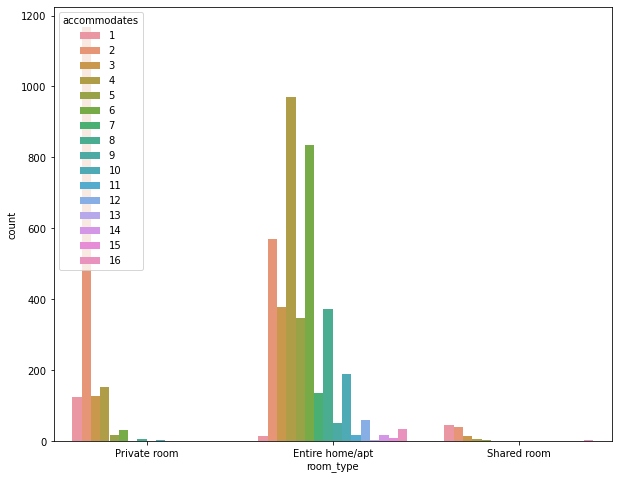

In [199]:
plt.figure(figsize=(10, 8))
sns.countplot(data=dfcopy, x='room_type', hue='accommodates')

Most of the private room can accommodates 2 people and entire home or apartment can accomodates 4 people.

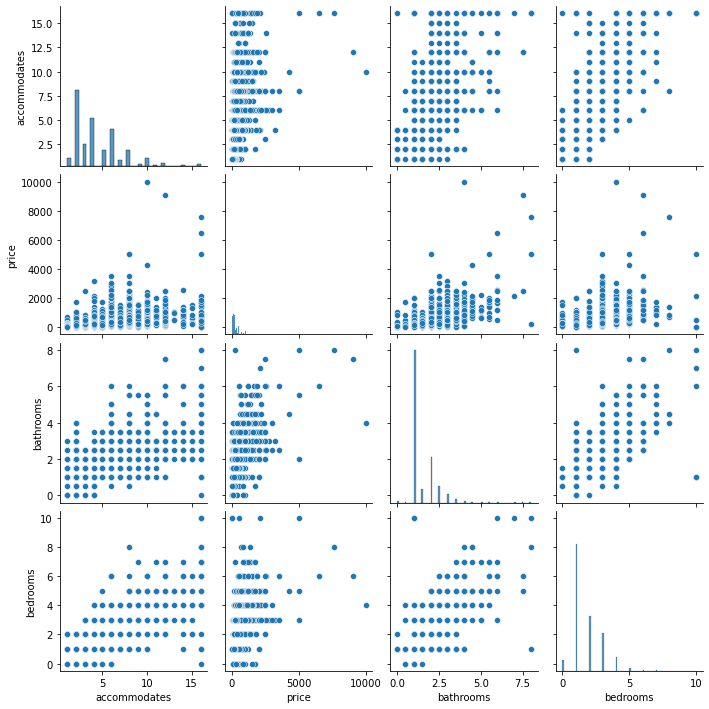

In [203]:
sns.pairplot(dfcopy[["accommodates", 'price', 'bathrooms', 'bedrooms']])

Bigger building can accommodate more people, it means it is more expensive and shown at the scatterplot, bigger buiolding has more bathrooms and bedrooms too.
most of the price are clustered at price lower than $ 5,000. And the bathrooms are scatter from 1 till 3 or 4 bathrooms.

## VIII. Data Pre-Processing

### a. Splitting between `X` (Features) and `y` (Target)

In [33]:
#split model data to features and target
x = dfcopy.drop('price', axis = 1) #features
y = dfcopy['price'] #target
x.head(5)

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,...,longitude(East),maximum_nights,number_of_reviews,property_type,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type
0,6,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",0,2.5,Real Bed,1.0,3.0,1,moderate,1,...,114.059600,10,1,House,10.0,10.0,10.0,100.0,10.0,Private room
1,2,"{""Air Conditioning"",Heating,""Family/Kid Friend...",29,0.0,Futon,1.0,1.0,1,moderate,1,...,114.043225,7,0,Camper/RV,0.0,0.0,0.0,0.0,0.0,Private room
2,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.5,Real Bed,1.0,1.0,2,flexible,1,...,114.079426,1125,0,House,0.0,0.0,0.0,0.0,0.0,Private room
3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.5,Real Bed,1.0,1.0,2,flexible,1,...,114.079035,1125,0,House,0.0,0.0,0.0,0.0,0.0,Private room
4,6,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",27,2.0,Real Bed,3.0,3.0,2,strict,1,...,114.055590,1125,0,House,0.0,0.0,0.0,0.0,0.0,Entire home/apt


In [34]:
y.head(5)

0    300.0
1     99.0
2    100.0
3    100.0
4    599.0
Name: price, dtype: float64

In [35]:
#split features and target to train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state=1)
print('Train Size: ', x_train.shape)
print('Test Size: ', x_test.shape)

Train Size:  (4331, 25)
Test Size:  (1444, 25)


In [36]:
#combine features and target for feature selection
x_train_copy = x_train.copy()
x_train_copy ['price'] = y_train
x_train_copy.head(2)

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,...,maximum_nights,number_of_reviews,property_type,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,price
1960,5,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.0,Real Bed,2.0,3.0,1,strict,1,...,11,2,House,9.0,10.0,8.0,90.0,8.0,Entire home/apt,805.0
2778,16,"{TV,Internet,""Wireless Internet"",""Air Conditio...",30,2.5,Real Bed,4.0,8.0,3,strict,9,...,30,5,House,10.0,10.0,8.0,100.0,10.0,Entire home/apt,500.0


### b. Correlation and Multicollinearity

interval columns not set, guessing: ['accommodates', 'availability_30', 'bathrooms', 'bedrooms', 'beds', 'calculated_host_listings_count', 'guests_included', 'host_listings_count', 'latitude(North)', 'longitude(East)', 'maximum_nights', 'number_of_reviews', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_rating', 'review_scores_value', 'price']


<AxesSubplot:>

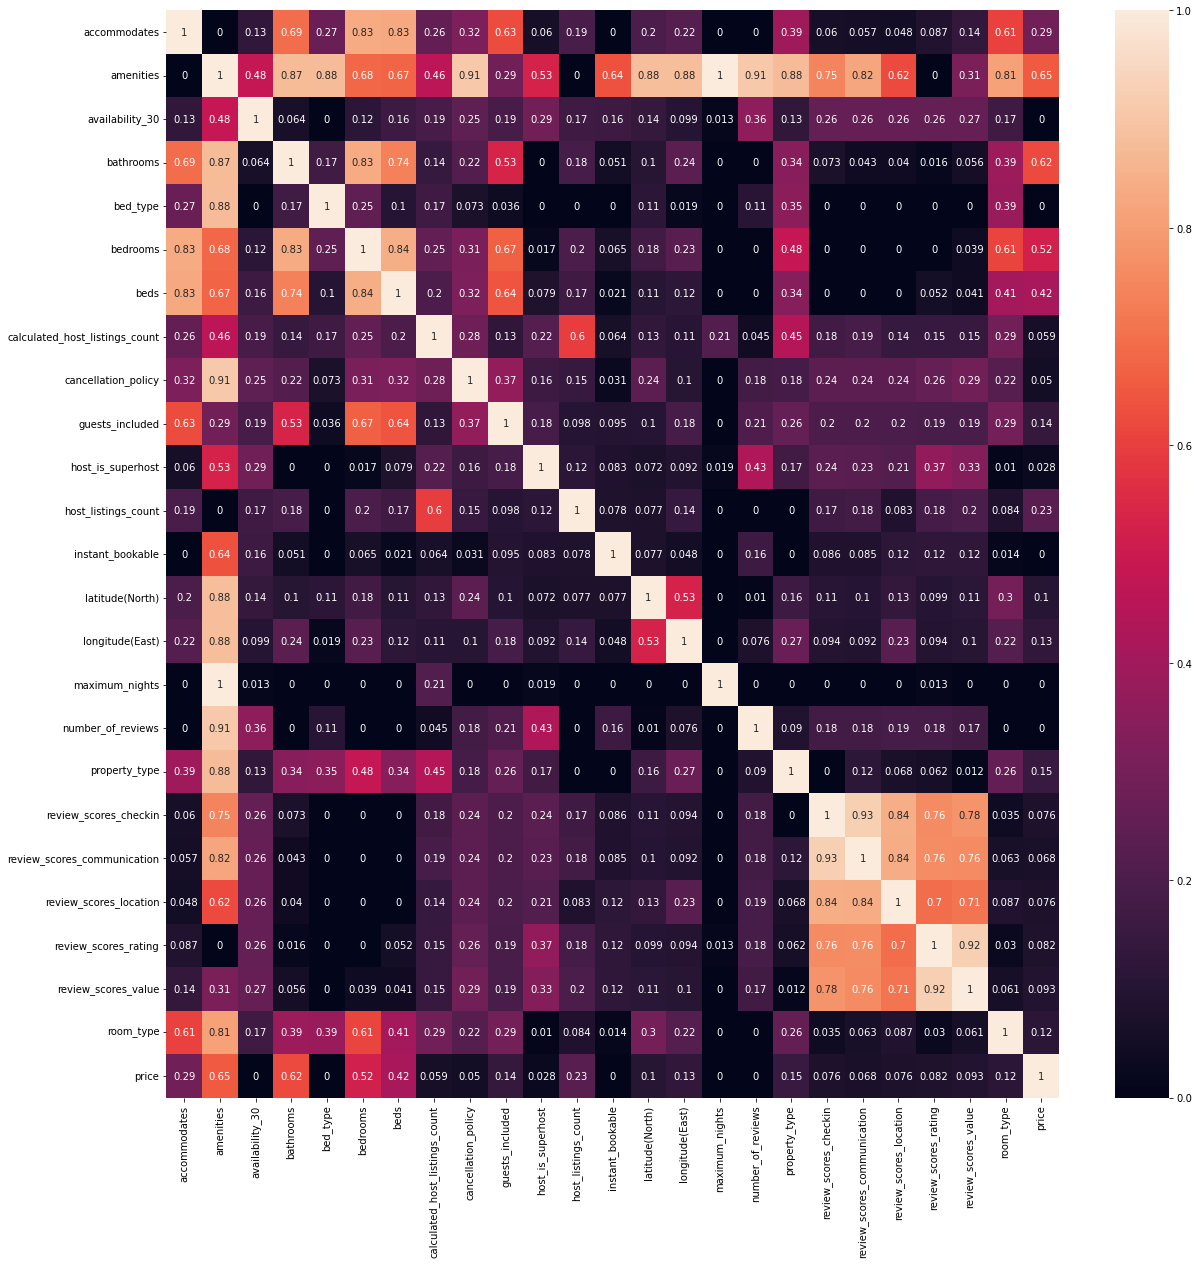

In [37]:
# of Phik Matrix.
plt.figure(figsize=(20, 20))
sns.heatmap(x_train_copy.phik_matrix(), vmin = 0, vmax = 1, annot = True)

`price` correlation conditions:

- Very high correlation (0.9 - 1) are found in `bathrooms`.
- High correlation (0.7 - 0.9) are found in:
    1. `accomodates`
    2. `bedrooms`, `beds`
    3. `calculated_host_listings_count`
    4. `guest_included`
    5. `host_listings_count`
    6. `room_type`
- Moderate correlation (0.5 - 0.7) are found in:
    1. `cancellation_policy`
    2. `property_type`
- Low correlation (0.3 - 0.5) are found in:
    1. `availability_30`
    2. `bed_type`
    3. `longitude(East)`
    4. `review_scores_value`

In [38]:
x_train_copy.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,...,maximum_nights,number_of_reviews,property_type,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,price
1960,5,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.0,Real Bed,2.0,3.0,1,strict,1,...,11,2,House,9.0,10.0,8.0,90.0,8.0,Entire home/apt,805.0
2778,16,"{TV,Internet,""Wireless Internet"",""Air Conditio...",30,2.5,Real Bed,4.0,8.0,3,strict,9,...,30,5,House,10.0,10.0,8.0,100.0,10.0,Entire home/apt,500.0
5610,4,"{Internet,""Wireless Internet"",""Air Conditionin...",24,1.0,Real Bed,2.0,2.0,1,moderate,2,...,5,11,House,10.0,10.0,8.0,94.0,9.0,Entire home/apt,170.0
3733,3,"{""Cable TV"",""Wireless Internet"",""Air Condition...",11,1.0,Real Bed,1.0,2.0,2,moderate,0,...,1125,57,Other,10.0,10.0,10.0,96.0,10.0,Entire home/apt,150.0
4352,3,"{Internet,""Wireless Internet"",""Air Conditionin...",16,1.0,Real Bed,1.0,1.0,1,flexible,2,...,1125,0,Apartment,0.0,0.0,0.0,0.0,0.0,Entire home/apt,95.0


In [39]:
cols = ['bed_type', 'room_type', 'property_type', 'cancellation_policy']

for i in cols:
    print(i, ' unique: ', x_train_copy[i].unique())

bed_type  unique:  ['Real Bed' 'Futon' 'Couch' 'Airbed' 'Pull-out Sofa']
room_type  unique:  ['Entire home/apt' 'Private room' 'Shared room']
property_type  unique:  ['House' 'Other' 'Apartment' 'Condominium' 'Townhouse' 'Loft'
 'Bed & Breakfast' 'Cabin' 'Bungalow' 'Camper/RV' 'Earth House' 'Tent'
 'Treehouse' 'Boat' 'Chalet' 'Villa']
cancellation_policy  unique:  ['strict' 'moderate' 'flexible' 'no_refunds' 'super_strict_30']


All of the categorical are ordinal types because each one of them has difference prices and for cancellation policy it can be scaled.

In [40]:
df['property_type'].nunique()

18

In [41]:
oec = OrdinalEncoder()#encode function using ordinal encoder

#encode data
oec.fit(x_train_copy[['bed_type', 'room_type', 'property_type', 'cancellation_policy']])

#encoded data applied
x_train_copy[['bed_type', 'room_type', 'property_type', 'cancellation_policy']] = oec.transform(x_train_copy[['bed_type', 'room_type', 'property_type', 'cancellation_policy']])

x_train_copy.head(2)

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,...,maximum_nights,number_of_reviews,property_type,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,price
1960,5,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.0,4.0,2.0,3.0,1,3.0,1,...,11,2,9.0,9.0,10.0,8.0,90.0,8.0,0.0,805.0
2778,16,"{TV,Internet,""Wireless Internet"",""Air Conditio...",30,2.5,4.0,4.0,8.0,3,3.0,9,...,30,5,9.0,10.0,10.0,8.0,100.0,10.0,0.0,500.0


In [42]:
#check multicollinearity between selected features engineering
from statsmodels.stats.outliers_influence import variance_inflation_factor

s = x_train_copy[['accommodates', 'bedrooms', 'beds', 'calculated_host_listings_count', 'guests_included',
                    'host_listings_count', 'room_type', 'property_type', 'cancellation_policy',
                    'availability_30', 'bed_type', 'longitude(East)', 'review_scores_value']] #selected features engine

vif=pd.DataFrame()
vif['features'] = s.columns
vif['VIF'] = [variance_inflation_factor(s, i) for i in range(s.shape[1])]

vif


,features,VIF
0,accommodates,15.980817
1,bedrooms,11.702943
2,beds,10.416168
3,calculated_host_listings_count,2.050037
4,guests_included,2.891431
...,...,...
8,cancellation_policy,2.821925
9,availability_30,2.885106
10,bed_type,53.725988
11,longitude(East),67.196513


From vif test, `accommodates`, `bedrooms`, `beds`, `bed_type`, `longitude(East)` has very high multicollinearity.
Based from heatmap correaltion, accomodates first and beds will be dropped because it can be represent with bedrooms.

In [43]:
#check multicollinearity between selected features engineering
from statsmodels.stats.outliers_influence import variance_inflation_factor

s = x_train_copy[['bedrooms', 'calculated_host_listings_count', 'guests_included',
                    'host_listings_count', 'room_type', 'property_type', 'cancellation_policy',
                    'availability_30', 'bed_type', 'longitude(East)', 'review_scores_value']] #selected features engine

vif=pd.DataFrame()
vif['features'] = s.columns
vif['VIF'] = [variance_inflation_factor(s, i) for i in range(s.shape[1])]

vif

,features,VIF
0,bedrooms,5.385826
1,calculated_host_listings_count,2.033789
2,guests_included,2.718283
3,host_listings_count,1.280123
4,room_type,1.954876
...,...,...
6,cancellation_policy,2.811506
7,availability_30,2.874878
8,bed_type,53.243326
9,longitude(East),64.803754


In [44]:
#check multicollinearity between selected features engineering
from statsmodels.stats.outliers_influence import variance_inflation_factor

s = x_train_copy[['bedrooms', 'calculated_host_listings_count', 'guests_included',
                    'host_listings_count', 'room_type', 'property_type', 'cancellation_policy',
                    'availability_30', 'bed_type', 'review_scores_value']] #selected features engine

vif=pd.DataFrame()
vif['features'] = s.columns
vif['VIF'] = [variance_inflation_factor(s, i) for i in range(s.shape[1])]

vif
vif

,features,VIF
0,bedrooms,5.157046
1,calculated_host_listings_count,2.014701
2,guests_included,2.717921
3,host_listings_count,1.276883
4,room_type,1.700324
5,property_type,3.666079
6,cancellation_policy,2.808808
7,availability_30,2.813700
8,bed_type,7.673191
9,review_scores_value,3.096187


After dropping longitude(EAST), vif value is less than 10. Moderate vif treshold will be used.

### c. Feature Selection

In [45]:
x_train_model = x_train[['bedrooms', 'calculated_host_listings_count', 'guests_included',
                    'host_listings_count', 'room_type', 'property_type', 'cancellation_policy',
                    'availability_30', 'bed_type', 'review_scores_value']]
x_test_model = x_test[['bedrooms', 'calculated_host_listings_count', 'guests_included',
                    'host_listings_count', 'room_type', 'property_type', 'cancellation_policy',
                    'availability_30', 'bed_type', 'review_scores_value']]

### d. Splitting Categorical and Numercial

In [46]:
#Separate Numerical Columns and Categorical Columns

num_columns = x_train_model.select_dtypes(include=np.number).columns.tolist() 
cat_columns = x_train_model.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['bedrooms', 'calculated_host_listings_count', 'guests_included', 'host_listings_count', 'availability_30', 'review_scores_value']
Categorical Columns :  ['room_type', 'property_type', 'cancellation_policy', 'bed_type']


In [47]:
train_num = x_train_model[num_columns]
train_cat = x_train_model[cat_columns]

test_num = x_test_model[num_columns]
test_cat = x_test_model[cat_columns]

In [48]:
train_cat

,room_type,property_type,cancellation_policy,bed_type
1960,Entire home/apt,House,strict,Real Bed
2778,Entire home/apt,House,strict,Real Bed
5610,Entire home/apt,House,moderate,Real Bed
3733,Entire home/apt,Other,moderate,Real Bed
4352,Entire home/apt,Apartment,flexible,Real Bed
...,...,...,...,...
918,Private room,Apartment,flexible,Real Bed
5246,Entire home/apt,Apartment,moderate,Real Bed
4021,Entire home/apt,Apartment,flexible,Real Bed
240,Entire home/apt,House,strict,Real Bed


In [49]:
test_cat

,room_type,property_type,cancellation_policy,bed_type
1178,Private room,House,flexible,Real Bed
2150,Entire home/apt,House,moderate,Real Bed
1574,Entire home/apt,House,flexible,Real Bed
227,Private room,House,flexible,Real Bed
3286,Entire home/apt,House,moderate,Real Bed
...,...,...,...,...
670,Private room,Apartment,flexible,Real Bed
2726,Private room,House,flexible,Real Bed
3283,Entire home/apt,Apartment,strict,Real Bed
193,Private room,House,flexible,Real Bed


### e. Handling Outliers

In [50]:
#function for plotting histogram and boxplot
def plotting (x_train_model, feature):
    #figure size
    plt.figure (figsize=(15,5))

    #Histogram
    plt.subplot(1,2,1)
    sns.histplot(x_train_model[feature], bins=50)
    plt.title('Histogram')

    #Boxplot
    plt.subplot (1,2,2)
    sns.boxplot(y=x_train_model[feature])
    plt.title('Boxplot')

    plt.show()

=============== bedrooms ===============


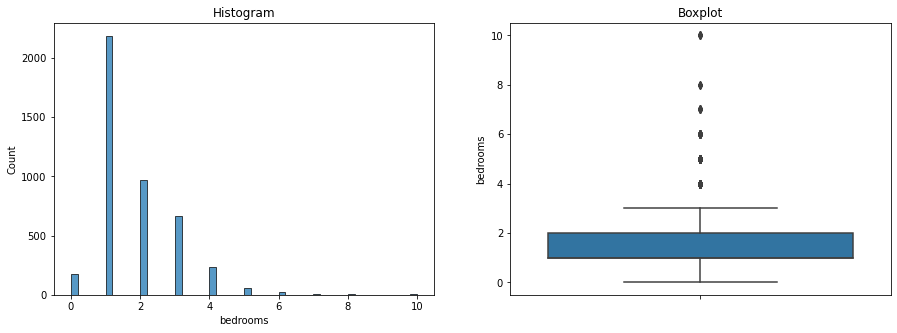

bedrooms 
Skweness Value:  1.6184244849548997
=============== calculated_host_listings_count ===============


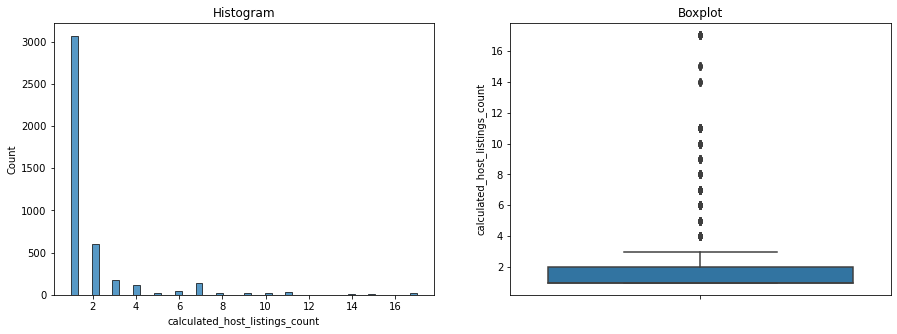

calculated_host_listings_count 
Skweness Value:  3.679574780179752
=============== guests_included ===============


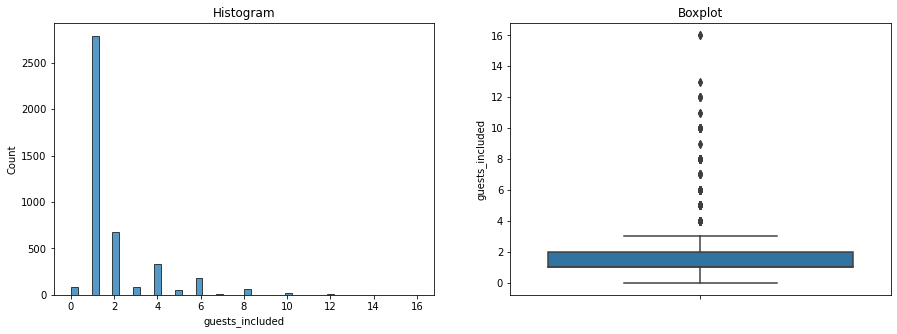

guests_included 
Skweness Value:  2.6339251162057966
=============== host_listings_count ===============


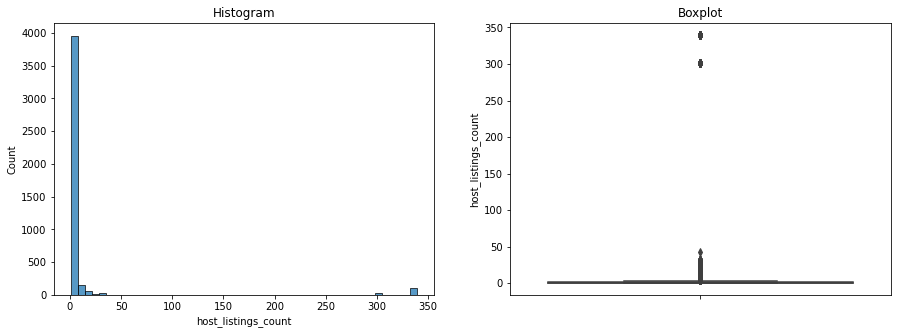

host_listings_count 
Skweness Value:  5.380980788589789
=============== availability_30 ===============


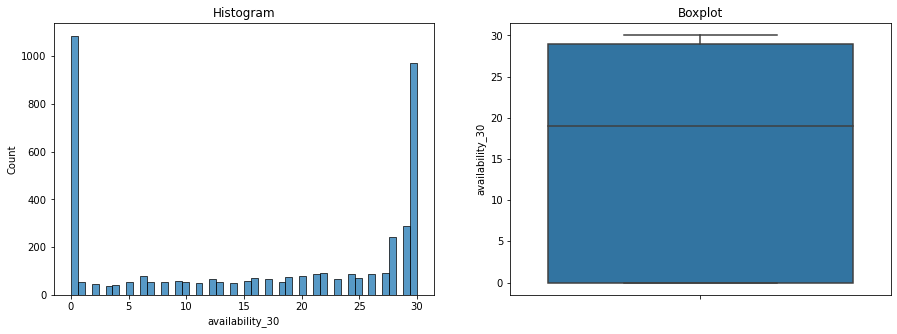

availability_30 
Skweness Value:  -0.24188293133193084
=============== review_scores_value ===============


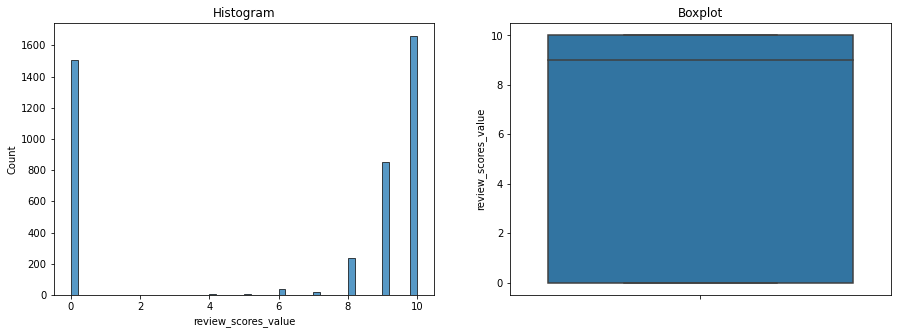

review_scores_value 
Skweness Value:  -0.5762805036058866


In [51]:
#plot distance to find data distribution and outliers
for i in num_columns: 
    print('='*15, i , '='*15)
    plotting(train_num, i)
    print(i, '\nSkweness Value: ', train_num[i].skew())

In [52]:
train_num.describe()

,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,availability_30,review_scores_value
count,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000
mean,1.758485,1.951743,1.891249,12.538444,16.436620,6.148695
std,1.156903,2.357481,1.799139,57.242248,12.314296,4.543356
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,19.000000,9.000000
75%,2.000000,2.000000,2.000000,2.000000,29.000000,10.000000
max,10.000000,17.000000,16.000000,339.000000,30.000000,10.000000


Most of the data has high standard deviation this is caused by outliers.

In [124]:
num_columns

['bedrooms',
 'calculated_host_listings_count',
 'guests_included',
 'host_listings_count',
 'availability_30',
 'review_scores_value']

In [53]:
for i in num_columns:
    winsorize = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=[i])
    winsorize.fit(train_num)
    train_num = winsorize.transform(train_num)
    test_num=winsorize.transform(test_num)

In [54]:
train_num.describe()

,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,availability_30,review_scores_value
count,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000
mean,1.680905,1.499076,1.579081,1.589933,16.436620,6.148695
std,0.944904,0.864824,0.960257,0.929529,12.314296,4.543356
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,19.000000,9.000000
75%,2.000000,2.000000,2.000000,2.000000,29.000000,10.000000
max,3.500000,3.500000,3.500000,3.500000,30.000000,10.000000


train_num has been capped

In [55]:
test_num.describe()

,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,availability_30,review_scores_value
count,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000
mean,1.628116,1.440097,1.589681,1.538089,16.618421,6.011773
std,0.931953,0.807136,0.951395,0.886256,12.331153,4.573630
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,20.000000,9.000000
75%,2.000000,2.000000,2.000000,2.000000,29.000000,10.000000
max,3.500000,3.500000,3.500000,3.500000,30.000000,10.000000


=============== bedrooms ===============


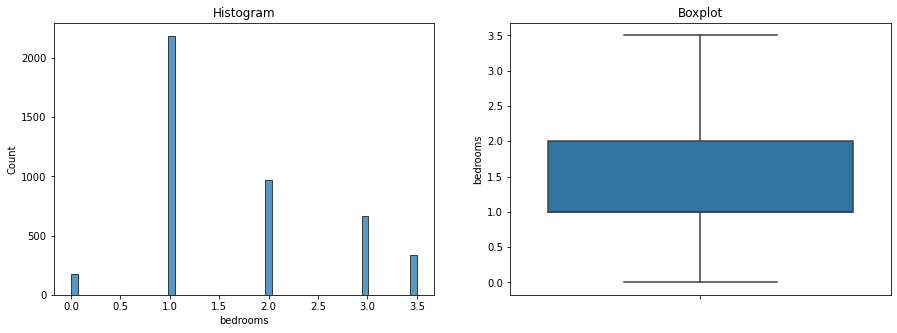

bedrooms 
Skweness Value:  0.5516058977692117
=============== calculated_host_listings_count ===============


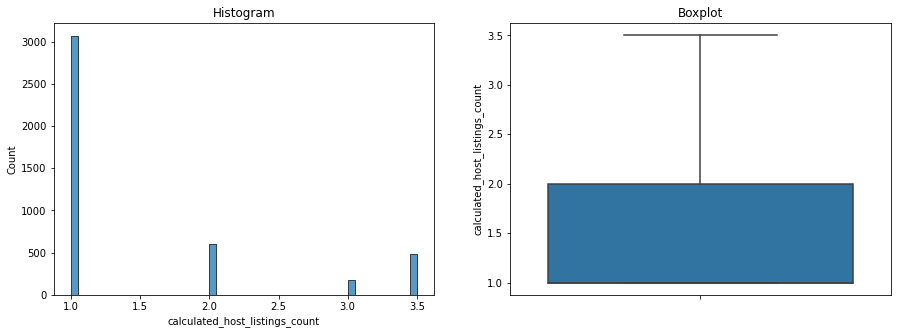

calculated_host_listings_count 
Skweness Value:  1.480109847539652
=============== guests_included ===============


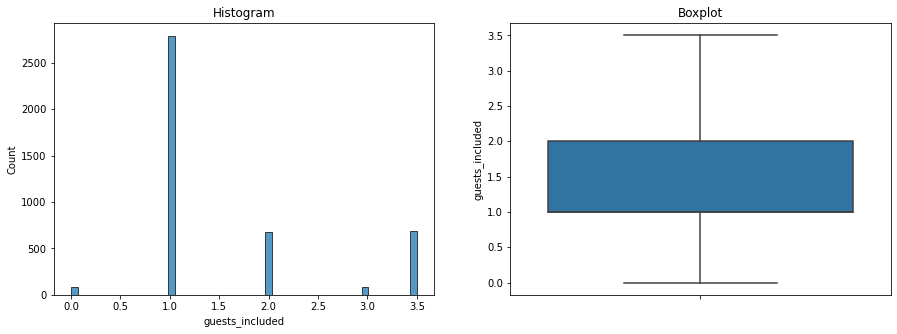

guests_included 
Skweness Value:  1.1359624246612228
=============== host_listings_count ===============


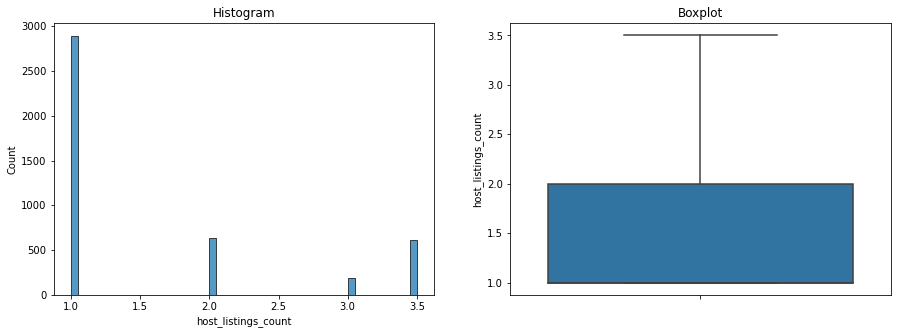

host_listings_count 
Skweness Value:  1.2324190292934172
=============== availability_30 ===============


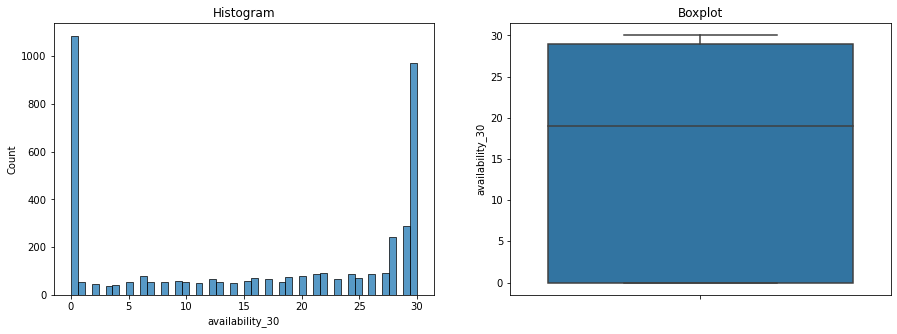

availability_30 
Skweness Value:  -0.24188293133193084
=============== review_scores_value ===============


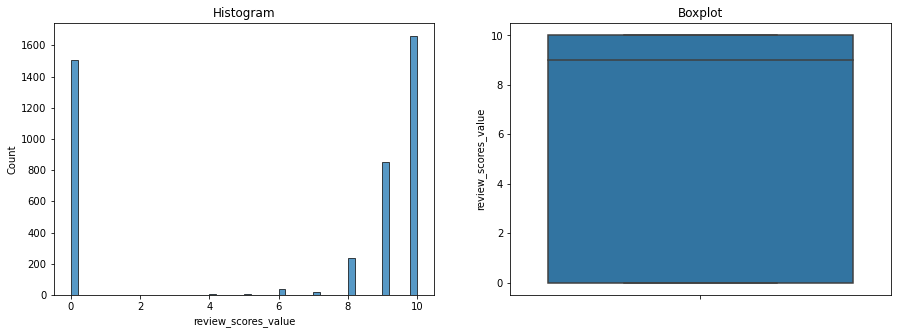

review_scores_value 
Skweness Value:  -0.5762805036058866


In [56]:
#plot distance to find data distribution and outliers
for i in num_columns: 
    print('='*15, i , '='*15)
    plotting(train_num, i)
    print(i, '\nSkweness Value: ', train_num[i].skew())

=============== bedrooms ===============


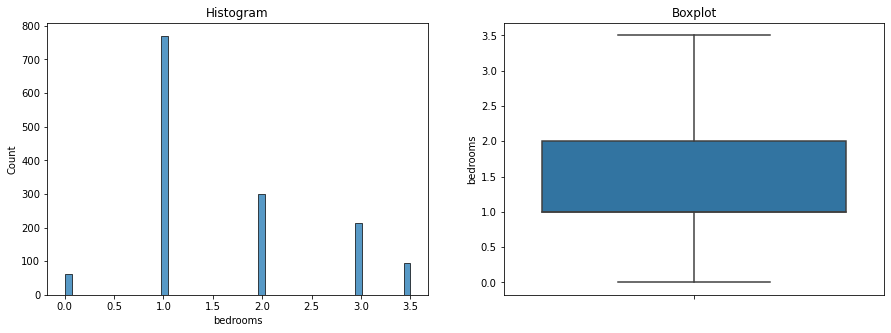

bedrooms 
Skweness Value:  0.6322966586440063
=============== calculated_host_listings_count ===============


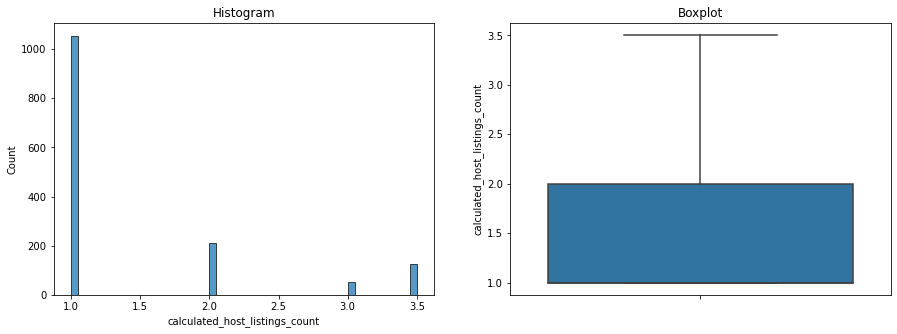

calculated_host_listings_count 
Skweness Value:  1.6657048366949492
=============== guests_included ===============


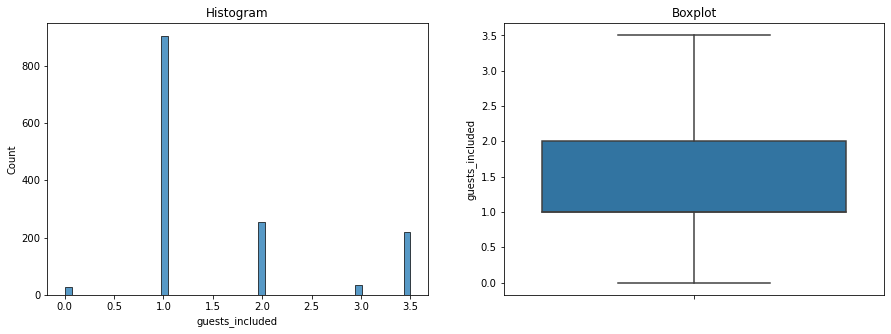

guests_included 
Skweness Value:  1.0970996294889759
=============== host_listings_count ===============


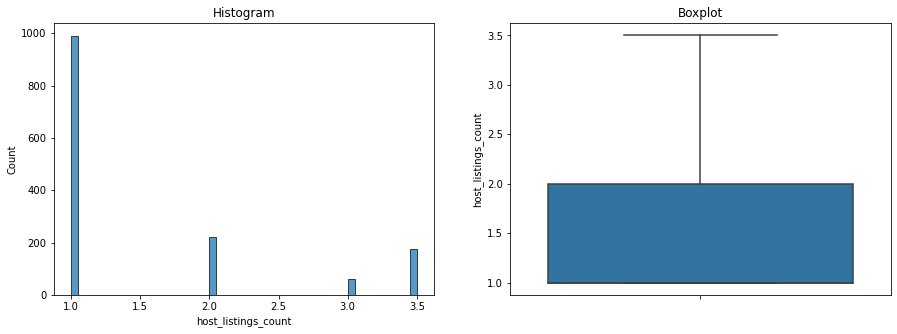

host_listings_count 
Skweness Value:  1.3679250163509942
=============== availability_30 ===============


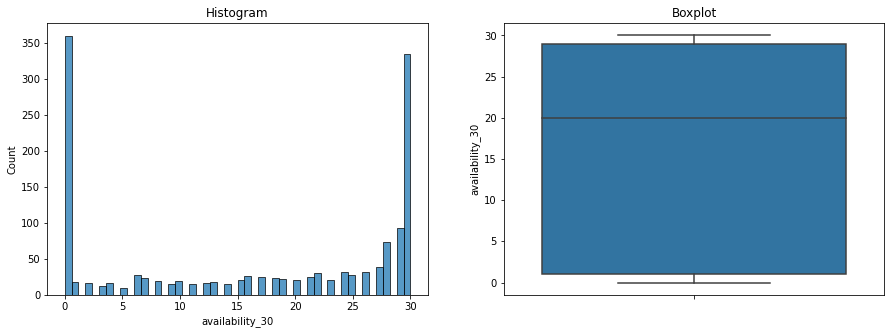

availability_30 
Skweness Value:  -0.2705783152084287
=============== review_scores_value ===============


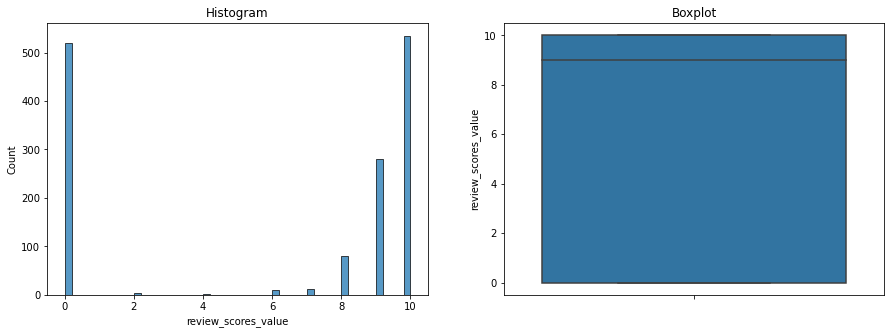

review_scores_value 
Skweness Value:  -0.5162454539267168


In [57]:
#plot distance to find data distribution and outliers
for i in num_columns: 
    print('='*15, i , '='*15)
    plotting(test_num, i)
    print(i, '\nSkweness Value: ', test_num[i].skew())

Outliers has been handled

### f. Feature Scaling

In [58]:
#scale dataframe to have Gaussian like distribution
pt = PowerTransformer()
pt.fit(train_num)

train_scaled = pt.transform(train_num)
test_scaled = pt.transform(test_num)

Scaled using power transformer to have gaussian-like distribution

### g. Feature Encoding

In [147]:
cat_columns

['room_type', 'property_type', 'cancellation_policy', 'bed_type']

In [60]:
#Ordinal encoder is used because object has rank
oec = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=19)#encode function using ordinal encoder

#encode data
oec.fit(train_cat[cat_columns])

#encoded data applied
train_cat[cat_columns] = oec.transform(train_cat[cat_columns])
test_cat[cat_columns] = oec.transform(test_cat[cat_columns])

### h. Concate between Numerical Columns and Categorical Columns

In [61]:
train_final = np.concatenate([train_scaled,train_cat.reset_index(drop=True)], axis =1)
test_final = np.concatenate([test_scaled,test_cat.reset_index(drop=True)], axis =1)

In [62]:
df_train_final = pd.DataFrame(train_final)
df_test_final = pd.DataFrame(test_final)

## IX. Model Definition

In [63]:
# Training using Linear Regression
lin_reg = LinearRegression()

In [64]:
# Training using Ridge Regression
ridge = Ridge()

In [65]:
# Training using Random Forest Regressor
forest_r = RandomForestRegressor()

In [66]:
# Training using SVR
svr_ = SVR()

## X. Model Training

### Linear Regression

In [67]:
lin_reg.fit(train_final, y_train)

LinearRegression()

In [68]:
# Predict Train-Set and Test-Set 

ypred_lin = lin_reg.predict(df_train_final)
ytest_lin = lin_reg.predict(df_test_final)

### Ridge Regression

In [69]:
ridge.fit(train_final, y_train)

Ridge()

In [70]:
#Predict Train-Set and Test-Set 

ypred_rid = ridge.predict(df_train_final)
ytest_rid = ridge.predict(df_test_final)

### Random Forest Regression

In [71]:
forest_r.fit(train_final, y_train)

RandomForestRegressor()

In [72]:
#Predict Train-Set and Test-Set 

ypred_forest = forest_r.predict(df_train_final)
ytest_forest = forest_r.predict(df_test_final)

### SVR

In [73]:
svr_.fit(train_final, y_train)

SVR()

In [74]:
#Predict Train-Set and Test-Set 

ypred_svr = svr_.predict(df_train_final)
ytest_svr = svr_.predict(df_test_final)

## XI. Model Evaluation

### Linear Regression

In [75]:
ypred_lin

array([447.30445708, 497.30122781, 343.13021819, ..., 357.01603488,
       463.20774981, 523.65169921])

In [76]:
ytest_lin

array([253.46554836, 483.54752419, 692.65366233, ..., 545.42080839,
       253.46554836, 320.33169196])

### Ridge Regression

In [77]:
ypred_rid

array([447.26238848, 497.26030108, 343.10831745, ..., 356.95747364,
       463.1630792 , 523.59746876])

In [78]:
ytest_rid

array([253.50095252, 483.50039145, 692.5692135 , ..., 545.36340988,
       253.50095252, 320.29757279])

### RandomForest Regression

In [79]:
ypred_forest

array([561.35157143, 441.5034127 , 165.56733333, ..., 251.73666667,
       228.644     , 273.52375   ])

In [80]:
ytest_forest

array([ 152.205922  ,  253.5625    , 1035.23223058, ...,  407.99166858,
        152.205922  ,  206.58206449])

### SVR Regression

In [81]:
ypred_svr

array([217.89332731, 232.07632189, 199.36827332, ..., 168.49464553,
       221.05439898, 215.97452518])

In [82]:
ytest_svr

array([164.42116646, 220.22741403, 254.04992633, ..., 192.88330838,
       164.42116646, 172.5301864 ])

### Mean Absolute Evaluation

In [120]:
#Evaluate Linear Regression

#Check MAE data training and data test with data predict
MAE_lin_train = mean_absolute_error(y_train, ypred_lin)
MAE_lin_test = mean_absolute_error(y_test, ytest_lin)
print('MAE lin train = ', MAE_lin_train)
print('MAE lin test = ', MAE_lin_test)

#Check RMSE data training and data test with data predict
RMSE_lin_train = mean_squared_error(y_train, ypred_lin, squared = False)
RMSE_lin_test = mean_squared_error(y_test, ytest_lin,squared = False)
print('RMSE train = ', RMSE_lin_train)
print('RMSE test = ', RMSE_lin_test)

#Check R2score data trainning and data test with data predict
r2score_lin_train = r2_score(y_train, ypred_lin)
r2score_lin_test = r2_score(y_test, ytest_lin)
print('r2score train = ', r2_score(y_train, ypred_lin))
print('r2score test = ', r2_score(y_test, ytest_lin))

MAE lin train =  174.59418827432472
MAE lin test =  160.83795895002163
RMSE train =  368.870902150502
RMSE test =  270.0635755448467
r2score train =  0.25490690252817017
r2score test =  0.3035280033996226


Linear regression has underfit performance which can be seen from MAE, RMSE, and r2score which the test model has better performance. RMSE score shows higher score far above from MAE score which highlight there is outliers in the data.

In [121]:
#Evaluate Ridge Regression

#Check MAE data training and data test with data predict
MAE_rid_train = mean_absolute_error(y_train, ypred_rid)
MAE__rid_test = mean_absolute_error(y_test, ytest_rid)
print('MAE train = ', MAE_rid_train)
print('MAE test = ', MAE__rid_test)

#Check MSE data training and data test with data predict
RMSE_rid_train = mean_squared_error(y_train, ypred_rid,squared = False)
RMSE_rid_test = mean_squared_error(y_test, ytest_rid,squared = False)
print('RMSE train = ', RMSE_rid_train)
print('RMSE test = ', RMSE_rid_test)

#Check R2score data trainning and data test with data predict
r2score_rid_train = r2_score(y_train, ypred_rid)
r2score_rid_test = r2_score(y_test, ytest_rid)
print('r2score rid train = ', r2_score(y_train, ypred_rid))
print('r2score rid test = ', r2_score(y_test, ytest_rid))

MAE train =  174.5798725349717
MAE test =  160.82218935525606
RMSE train =  368.87090753023676
RMSE test =  270.0580186244281
r2score rid train =  0.2549068807948035
r2score rid test =  0.3035566647963577


In [118]:
#Evaluate RandomForest Regression

#Check MAE data training and data test with data predict
MAE_fr_train = mean_absolute_error(y_train, ypred_forest)
MAE_fr_test = mean_absolute_error(y_test, ytest_forest)
print('MAE train = ', MAE_fr_train)
print('MAE test = ', MAE_fr_test)

#Check MSE data training and data test with data predict
RMSE_fr_train = mean_squared_error(y_train, ypred_forest,squared = False)
RMSE_fr_test = mean_squared_error(y_test, ytest_forest,squared = False)
print('RMSE train = ', RMSE_fr_train)
print('RMSE test = ', RMSE_fr_test)

#Check R2score data trainning and data test with data predict
r2score_fr_train = r2_score(y_train, ypred_forest)
r2score_fr_test = r2_score(y_test, ytest_forest)
print('r2score fr train = ', r2_score(y_train, ypred_forest))
print('r2score fr test = ', r2_score(y_test, ytest_forest))

MAE train =  92.81468987734753
MAE test =  142.89107817234824
RMSE train =  246.74514739576023
RMSE test =  294.07481974114995
r2score fr train =  0.6666050746148928
r2score fr test =  0.1741763584075463


In [117]:
#Evaluate SVR Regression

#Check MAE data training and data test with data predict
MAE_svr_train = mean_absolute_error(y_train, ypred_svr)
MAE_svr_test = mean_absolute_error(y_test, ytest_svr)
print('MAE train = ', MAE_svr_train)
print('MAE test = ', MAE_svr_test)

#Check MSE data training and data test with data predict
RMSE_svr_train = mean_squared_error(y_train, ypred_svr,squared = False)
RMSE_svr_test = mean_squared_error(y_test, ytest_svr,squared = False)
print('RMSE train = ', RMSE_svr_train)
print('RMSE test = ', RMSE_svr_test)

#Check R2score data trainning and data test with data predict
r2score_svr_train = r2_score(y_train, ypred_svr)
r2score_svr_test = r2_score(y_test, ytest_svr)
print('r2score svr train = ', r2_score(y_train, ypred_svr))
print('r2score svr test = ', r2_score(y_test, ytest_svr))

MAE train =  171.39210837196603
MAE test =  149.49938768172436
RMSE train =  423.0119471621916
RMSE test =  313.9815346702547
r2score svr train =  0.020133272204785557
r2score svr test =  0.05858774305425951



Based from linear regression, ridge regression, random forest regressor, and SVR model evaluation: the smallest MAE and more stable RMSE between train and test are from Random Forest Regression. R2 score from Random Forest Regression has a wide gap between train and test model so it is overfit, but considered the train has the best score compared to the other models it will be used.

## XII. Model Improvement

In [162]:
param_grid = {'n_estimators': [50,100,150],
                'criterion': ['squared_error', 'absolute_error', 'poisson'],
                'max_depth': [50,100,150],
                'max_features': ['sqrt', 'log2']
                }
rf_bestcv = GridSearchCV(param_grid=param_grid, cv = 5,estimator=RandomForestRegressor(),scoring='r2')

In [163]:
rf_bestcv.fit(train_final, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [50, 100, 250],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 300]},
             scoring='r2')

In [164]:
rf_bestcv.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=100,
                      max_features='sqrt', n_estimators=50)

In [166]:
RF_best = RandomForestRegressor(criterion='absolute_error', 
max_depth=100, max_features='sqrt', n_estimators=50)

In [168]:
RF_best.fit(train_final,y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=100,
                      max_features='sqrt', n_estimators=50)

In [169]:
ypred_best = RF_best.predict(df_train_final)
ytest_best = RF_best.predict(df_test_final)

In [170]:
#Evaluate Linear Regression

#Check MAE data training and data test with data predict
MAE_best_train = mean_absolute_error(y_train, ypred_best)
MAE_best_test = mean_absolute_error(y_test, ytest_best)
print('MAE best train = ', MAE_best_train)
print('MAE best test = ', MAE_best_test)

#Check RMSE data training and data test with data predict
RMSE_best_train = mean_squared_error(y_train, ypred_best, squared = False)
RMSE_best_test = mean_squared_error(y_test, ytest_best,squared = False)
print('RMSE train = ', RMSE_best_train)
print('RMSE test = ', RMSE_best_test)

#Check R2score data trainning and data test with data predict
r2score_best_train = r2_score(y_train, ypred_best)
r2score_best_test = r2_score(y_test, ytest_best)
print('r2score train = ', r2_score(y_train, ypred_best))
print('r2score test = ', r2_score(y_test, ytest_best))

MAE best train =  92.50600092357423
MAE best test =  127.88367036011081
RMSE train =  263.1220533137368
RMSE test =  264.3258128790208
r2score train =  0.6208803947452062
r2score test =  0.3328080685423602


Random Forest Regression after GridSearchCV has underfit performance which can be seen from MAE and r2score which the test model has better performance. RMSE score shows higher score far above from MAE score which still highlight outliers in the data. But, it is far better which shown from r2score test from 0.17 to 0.33, r2score train decrease a bit from 0.66 to 0.62. MAE and RMSE for train and test model shown improvement which can be seen from the decreasing score.

## XIII. Model Inference

In [176]:
#create values for inference data
bedrooms = [1,2,3]
calculated_host_listings_count = [3,4,5]
guests_included = [2,4,6]
host_listings_count = [10,11,12]
availability_30=[20,10,5]
review_scores_value=[70,80,90]
room_type = [0,1,2]
property_type = [0,1,2]
cancellation_policy = [0,1,2]
bed_type = [0,0,0]

inf = list(zip(bedrooms,calculated_host_listings_count,guests_included,
                 host_listings_count,availability_30, review_scores_value,
                 room_type, property_type, cancellation_policy,
                  bed_type)) #merge each data to be columns

df_inf = pd.DataFrame(inf, columns = ['bedrooms','calculated_host_listings_count','guests_included',
                 'host_listings_count','availability_30', 'review_scores_value',
                 'room_type', 'property_type', 'cancellation_policy',
                  'bed_type']) #define column name

In [221]:
df_inf

,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,availability_30,review_scores_value,room_type,property_type,cancellation_policy,bed_type
0,1,3,2,10,20,70,0,0,0,0
1,2,4,4,11,10,80,1,1,1,0
2,3,5,6,12,5,90,2,2,2,0


In [177]:
ytest_best = RF_best.predict(df_inf)

In [178]:
ytest_best

array([294.06, 238.14, 236.14])

## XIV. Conclusion

From the EDA, dataset tells some of the hosts don't fill bathrooms and bedrooms column which is the most important feature for rental house/rooms. Most of the OYO rental house/room in Shenzen, China is $175, private room usually accommodates 2 people and for the entire house/apartment are 4 people. House or room that can accommodates more than 2 people have higher price. 

The best model used to predict OYO rental price in China is Random Forest Regressor because from the train and test model, it has the most consistent and stable RMSE score even though the MAE train and test score has wider gap compare to MAE score. For the r2score, the train score is the highest and leave out the other model score with 0.621 but the test score is very disappointing 0.33 but random forest is famous for its overfitting characteristic. 

The model need to be improved through removing several features, because this model used too many features that can be seen where train model has better score than test model. Linear regression and ridge regression probably can be tried with improvement through gridsearchcv, they probably can give better result than random forest regressor. 

## XV. Pipeline

In [204]:
num_pipeline = Pipeline([
                        ('outliers', Winsorizer(capping_method='iqr',
                        tail = 'both',
                        fold=1.5,
                        variables= num_columns)),
                        ('scaler', PowerTransformer())
                        ])
                        
cat_pipeline = Pipeline([('encoding', OrdinalEncoder(handle_unknown='use_encoded_value',
                        unknown_value=19))
                        ])

numeric = num_pipeline.fit_transform(train_num)
categoric = cat_pipeline.fit_transform(train_cat)

preprocess = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_columns),
    ('cat', cat_pipeline, cat_columns)
])

In [205]:
pipe = Pipeline([('preprocessing', preprocess), ('classifier', RF_best)], memory='cache_folder')

In [207]:
pipe.fit(x_train,y_train)

Pipeline(memory='cache_folder',
         steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outliers',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['bedrooms',
                                                                                         'calculated_host_listings_count',
                                                                                         'guests_included',
                                                                                         'host_listings_count',
                                                                                         'availability_30',
                                                                                         'review_scores_value'])),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  ['bed...
                                                   'host_listings_count',
                                                   'availability_30',
                                                   'review_scores_value']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoding',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=19))]),
                                                  ['room_type', 'property_type',
                                                   'cancellation_policy',
                                                   'bed_type'])])),
                ('classifier',
                 RandomForestRegressor(criterion='absolute_error',
                                       max_depth=100, max_features='sqrt',
                                       n_estimators=50))])

In [216]:
ytrain_pipe = pipe.predict(x_train)

In [217]:
ytest_pipe = pipe.predict(x_test)

In [218]:
#Evaluate Linear Regression

#Check MAE data training and data test with data predict
MAE_pipe_train = mean_absolute_error(y_train, ytrain_pipe)
MAE_pipe_test = mean_absolute_error(y_test, ytest_pipe)
print('MAE pipe train = ', MAE_best_train)
print('MAE pipe test = ', MAE_best_test)

#Check RMSE data training and data test with data predict
RMSE_pipe_train = mean_squared_error(y_train, ytrain_pipe, squared = False)
RMSE_pipe_test = mean_squared_error(y_test, ytest_pipe,squared = False)
print('RMSE train = ', RMSE_pipe_train)
print('RMSE test = ', RMSE_pipe_test)

#Check R2score data trainning and data test with data predict
r2score_pipe_train = r2_score(y_train, ytrain_pipe)
r2score_pipe_test = r2_score(y_test, ytest_pipe)
print('r2score train = ', r2_score(y_train, ytrain_pipe))
print('r2score test = ', r2_score(y_test, ytest_pipe))

MAE pipe train =  92.50600092357423
MAE pipe test =  127.88367036011081
RMSE train =  262.72027896575287
RMSE test =  266.1974739559195
r2score train =  0.6220373045316475
r2score test =  0.3233259955721658


The pipeline evaluation is same with random forest regressor evaluation because pipeline is a method to streamline coding and for easier deployment to website or another platform

In [213]:
pickle.dump(pipe, open('pipe.pkl', 'wb'))